In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
df = pd.read_csv('data/bottle_regression.csv', low_memory=False)

In [4]:
df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [12]:
for i in df.columns:
    values = df[i][(df[i].notnull())][:3]
    print(i, values, end='\n\n')

Cst_Cnt 0    1
1    1
2    1
Name: Cst_Cnt, dtype: int64

Btl_Cnt 0    1
1    2
2    3
Name: Btl_Cnt, dtype: int64

Sta_ID 0    054.0 056.0
1    054.0 056.0
2    054.0 056.0
Name: Sta_ID, dtype: object

Depth_ID 0    19-4903CR-HY-060-0930-05400560-0000A-3
1    19-4903CR-HY-060-0930-05400560-0008A-3
2    19-4903CR-HY-060-0930-05400560-0010A-7
Name: Depth_ID, dtype: object

Depthm 0     0
1     8
2    10
Name: Depthm, dtype: int64

T_degC 0    10.50
1    10.46
2    10.46
Name: T_degC, dtype: float64

Salnty 0    33.440
1    33.440
2    33.437
Name: Salnty, dtype: float64

O2ml_L 2160    5.90
2161    6.02
2162    6.04
Name: O2ml_L, dtype: float64

STheta 0    25.649
1    25.656
2    25.654
Name: STheta, dtype: float64

O2Sat 2160     92.8
2161    111.8
2162     95.0
Name: O2Sat, dtype: float64

Oxy_µmol/Kg 2160    256.9761
2161    262.6628
2162    263.0892
Name: Oxy_µmol/Kg, dtype: float64

BtlNum 683767    1.0
683768    2.0
683770    3.0
Name: BtlNum, dtype: float64

RecInd 0    3
1    3

<Axes: >

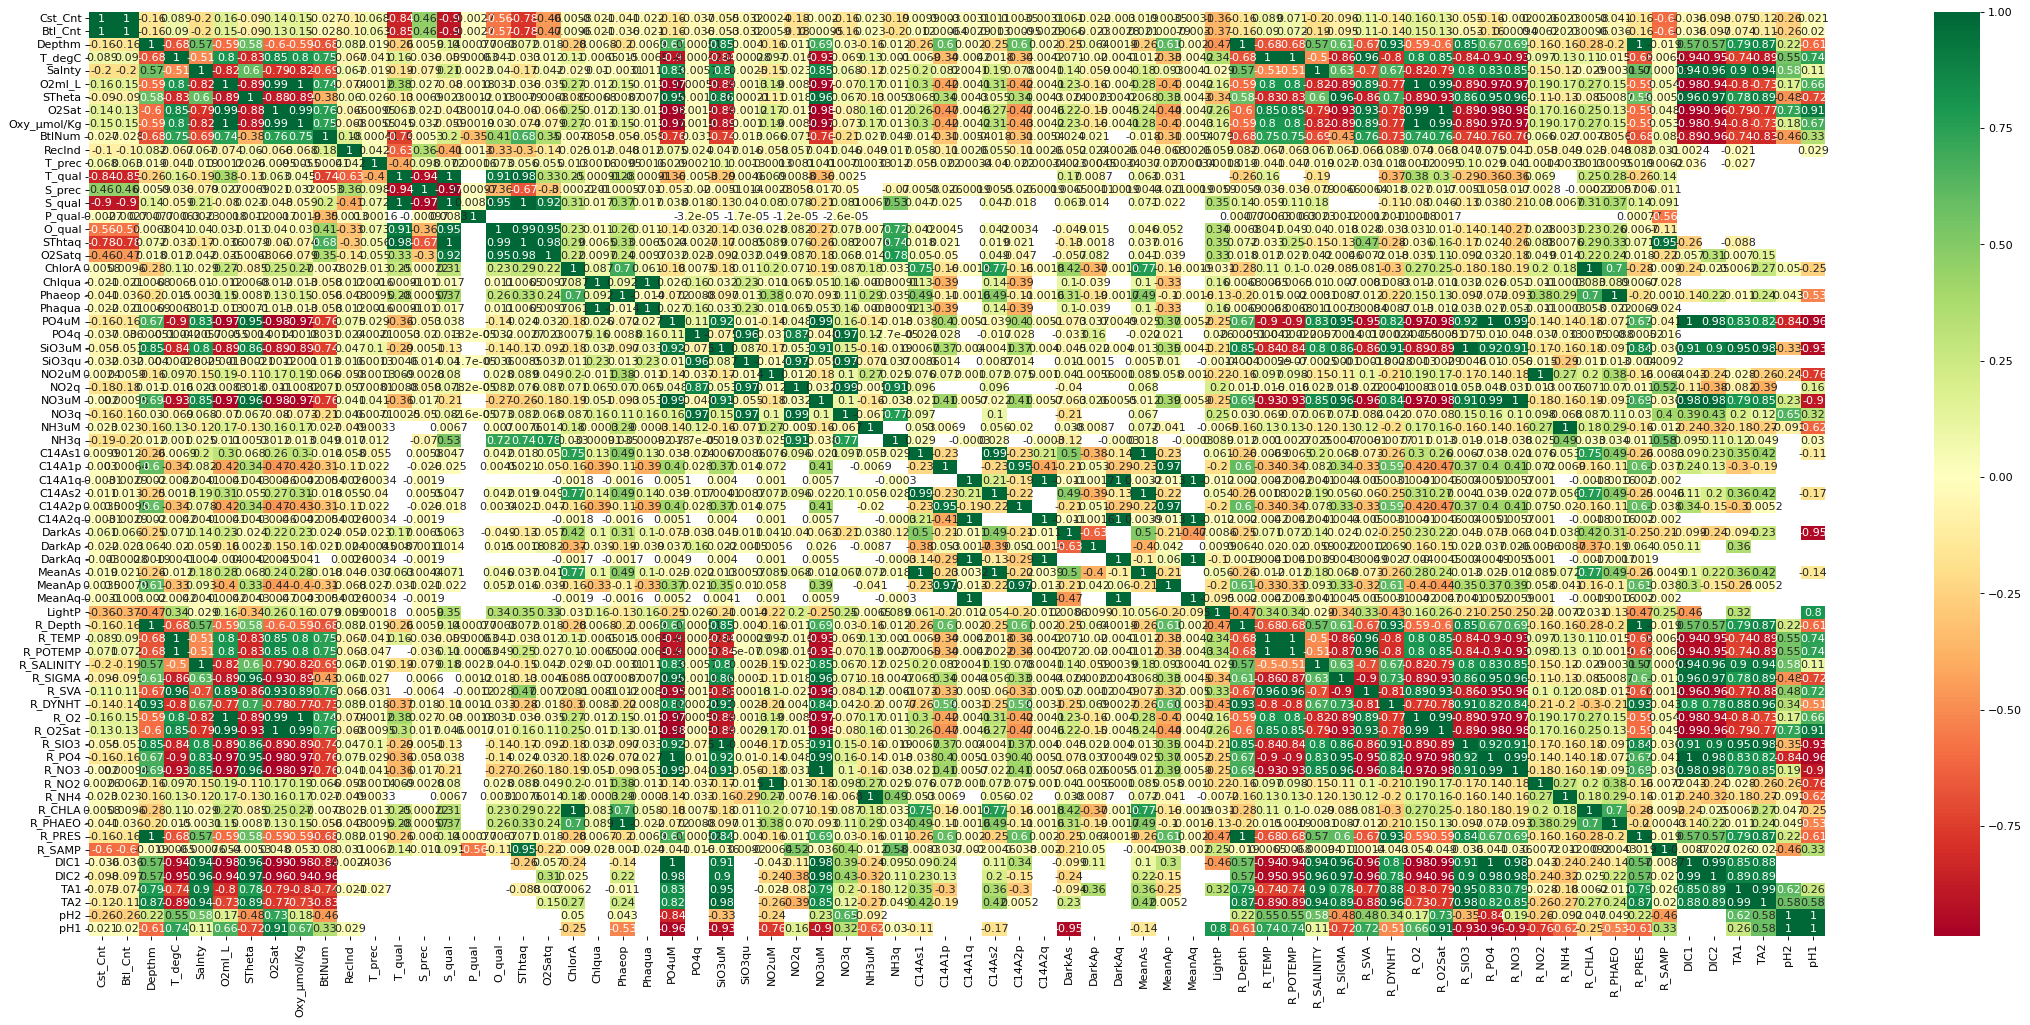

In [35]:
x = df.drop(columns=['Sta_ID', 'Depth_ID', 'IncTim', 'DIC Quality Comment'])

plt.figure(figsize=(35,15), dpi= 80)
sns.heatmap(x.corr(), xticklabels=x.corr().columns, yticklabels=x.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [43]:
y = df['O2Satq']
X = df[['T_qual', 'O_qual']]#, 'O_qual', 'R_O2Sat']]

In [44]:
all_data = X
all_data['y'] = y

/tmp/ipykernel_7691/540858182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['y'] = y


In [45]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   T_qual  23127 non-null   float64
 1   O_qual  184676 non-null  float64
 2   y       217797 non-null  float64
dtypes: float64(3)
memory usage: 19.8 MB


In [46]:
all_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 6695 entries, 134 to 809456
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T_qual  6695 non-null   float64
 1   O_qual  6695 non-null   float64
 2   y       6695 non-null   float64
dtypes: float64(3)
memory usage: 209.2 KB


In [47]:
all_data.dropna(inplace=True)

/tmp/ipykernel_7691/665733559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.dropna(inplace=True)


In [48]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6695 entries, 134 to 809456
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T_qual  6695 non-null   float64
 1   O_qual  6695 non-null   float64
 2   y       6695 non-null   float64
dtypes: float64(3)
memory usage: 209.2 KB


In [50]:
X_train, X_test, y_train, y_test = train_test_split(all_data[['T_qual', 'O_qual']], all_data.y, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем предсказания
y_pred = model.predict(X_test)

# Оцениваем модель
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.01
R² Score: 0.78
